<a href="https://colab.research.google.com/github/DanielTsuyoshi/Checkpoint01-Aprendizado-de-maquina/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nome: Daniel Tsuyoshi Yamamoto
### RM: 95344

## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
dados = pd.read_csv('aptos.csv', sep=',')

In [ ]:
dados.head(11)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


In [ ]:
dados.tail(11)

,metros,valor,quartos,vagas,reformado,bairro
103,53,220.0,2,1,1.0,Santa Teresinha
104,58,200.0,2,1,0.0,Santa Teresinha
105,44,237.0,2,2,0.0,Ferrazopolis
106,50,250.0,2,2,1.0,Santa Teresinha
107,73,565.0,3,2,0.0,Baeta Neves
108,77,359.0,2,2,0.0,Centro
109,65,340.0,2,2,1.0,Centro
110,56,247.0,2,1,0.0,Planalto
111,126,736.0,3,3,0.0,Iraja
112,96,560.0,3,1,0.0,Centro


In [ ]:
print(dados)

     metros  valor  quartos  vagas  reformado          bairro
0       107  560.0        3      2        0.0  Vila Lusitania
1       107  555.0        3      2        1.0  Vila Lusitania
2        49  196.0        2      1        0.0    Ferrazopolis
3       104  515.0        3      2        1.0          Centro
4        92  560.0        3      2        1.0  Vila Lusitania
..      ...    ...      ...    ...        ...             ...
109      65  340.0        2      2        1.0          Centro
110      56  247.0        2      1        0.0        Planalto
111     126  736.0        3      3        0.0           Iraja
112      96  560.0        3      1        0.0          Centro
113     103  667.0        3      3        0.0     Baeta Neves

[114 rows x 6 columns]


In [ ]:
dados['metros']

0      107
1      107
2       49
3      104
4       92
      ... 
109     65
110     56
111    126
112     96
113    103
Name: metros, Length: 114, dtype: int64

In [ ]:
dados[['bairro','valor']]

,bairro,valor
0,Vila Lusitania,560.0
1,Vila Lusitania,555.0
2,Ferrazopolis,196.0
3,Centro,515.0
4,Vila Lusitania,560.0
...,...,...
109,Centro,340.0
110,Planalto,247.0
111,Iraja,736.0
112,Centro,560.0


In [ ]:
dados['bairro'][51]

'Nova Petropolis'

In [ ]:
dados['reformado'].value_counts()

1.0    58
0.0    55
Name: reformado, dtype: int64

In [ ]:
dados[dados.bairro == 'Centro']

,metros,valor,quartos,vagas,reformado,bairro
3,104,515.0,3,2,1.0,Centro
6,140,635.0,4,3,1.0,Centro
12,65,350.0,2,2,1.0,Centro
13,71,303.0,3,1,0.0,Centro
16,106,710.0,3,2,1.0,Centro
18,80,460.0,3,2,1.0,Centro
21,80,485.0,3,2,1.0,Centro
24,100,495.0,3,2,0.0,Centro
26,104,445.0,3,2,1.0,Centro
30,147,798.0,4,2,0.0,Centro


In [ ]:
dados[dados.bairro == 'Centro'][dados.quartos == 2][dados.reformado == 1.0][dados.vagas == 2]

<ipython-input-59-126f94353685>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados[dados.bairro == 'Centro'][dados.quartos == 2][dados.reformado == 1.0][dados.vagas == 2]


,metros,valor,quartos,vagas,reformado,bairro
12,65,350.0,2,2,1.0,Centro
31,74,259.0,2,2,1.0,Centro
109,65,340.0,2,2,1.0,Centro


In [ ]:
dados.isna().sum()

metros       0
valor        1
quartos      0
vagas        0
reformado    1
bairro       0
dtype: int64

### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- metros: área total do apartamento em metros quadrados
- valor: valores dos apartamentos 
- quartos: número de quartos do apartamento
- vagas: número de vagas de garagem disponíveis
- reformado: indica se o apartamento foi reformado (0 = não foi reformado, 1 = já foi reformado)
- bairro: bairro onde o apartamento está localizado

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  Eu acho que o valor do apartamento pode subir, dependendo do bairro onde se encontre ou pelo número de metros quadrados.
2.  Denpendendo do números de quartos disponíveis e se foi ou não reformado pode afetar o valor.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     114 non-null    int64  
 1   valor      113 non-null    float64
 2   quartos    114 non-null    int64  
 3   vagas      114 non-null    int64  
 4   reformado  113 non-null    float64
 5   bairro     114 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB


In [ ]:
dados.describe()

,metros,valor,quartos,vagas,reformado
count,114.000000,113.000000,114.000000,114.000000,113.000000
mean,79.500000,401.539823,2.543860,1.675439,0.513274
std,27.516126,171.370059,0.582037,0.722528,0.502050
min,43.000000,188.000000,1.000000,0.000000,0.000000
25%,56.000000,255.000000,2.000000,1.000000,0.000000
50%,71.000000,347.000000,3.000000,2.000000,1.000000
75%,99.000000,515.000000,3.000000,2.000000,1.000000
max,199.000000,880.000000,4.000000,4.000000,1.000000


Text(0.5, 1.0, 'Valor dos apartamentos em relação aos metros quadrados')

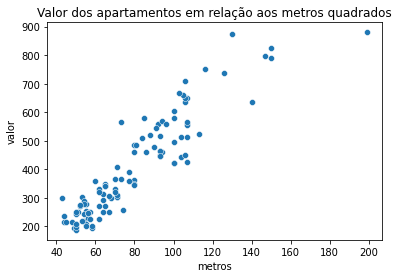

In [ ]:
sns.scatterplot(x='metros', y='valor', data=dados)
plt.title('Valor dos apartamentos em relação aos metros quadrados')

Text(0.5, 1.0, 'Valor dos apartamentos em relação ao número de quartos')

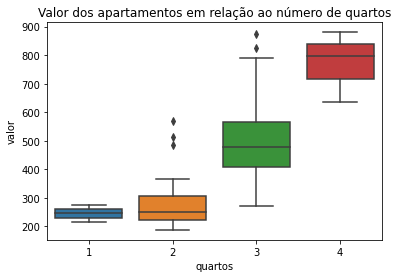

In [ ]:
sns.boxplot(x='quartos', y='valor', data=dados)
plt.title('Valor dos apartamentos em relação ao número de quartos')

Text(0.5, 1.0, 'Valor dos apartamentos em relação ao bairro')

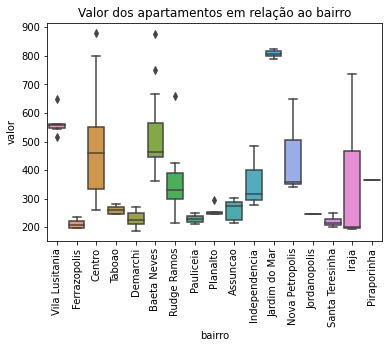

In [ ]:
sns.boxplot(x='bairro', y='valor', data=dados)
plt.xticks(rotation=90)
plt.title('Valor dos apartamentos em relação ao bairro')

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

Porque temos uma variável alvo definida (preço) e temos um conjunto de dados rotulados. portanto o melhor a utilizar é o aprendizado supervisionado, já que queremos prever o preço dos imóveis com base nas variáveis ​​preditoras e temos dados rotulados para treinar e avaliar o modelo.

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Regressão Linear
2. Árvore de decisão

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. Regressão Linear:  É um método usado para treinar um modelo que pode prever um valor, com base no conjunto de valores de entrada, naturalmente o algoritmo de regressão linear tenta encontrar a melhor linha de ajuste na qual se aproxima dos dados de treinamento, ou seja, o algoritmo de regressão Linear é um método usado para modelar as relações entre as variáveis de entrada e saída para fazer previsões precisas.
2. Árvore de decisão: É um algoritmo que trabalha criando uma árvore que representa as decisões que vão ser tomadas para chegar no resultado final. Cada nó da árvore vai representar uma decisão que vai precisar ser tomada e cada ramificação vai ser representado uma opção que pode ser escolhida.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
subset = dados[['metros', 'quartos', 'vagas', 'reformado', 'valor']].dropna()

In [ ]:
x = subset[['metros', 'quartos', 'vagas', 'reformado']]
y = subset['valor']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
len(x_train), len(x_test), len(y_train), len(y_test)

(78, 34, 78, 34)

In [ ]:
x_train.head(10)

,metros,quartos,vagas,reformado
33,71,3,2,0.0
56,55,2,1,0.0
65,44,1,1,1.0
28,55,2,1,0.0
80,56,2,1,0.0
5,51,2,1,0.0
109,65,2,2,1.0
71,67,2,1,1.0
39,85,3,2,1.0
35,106,3,2,1.0


In [ ]:
y_train.head(10)

33     410.0
56     277.0
65     215.0
28     280.0
80     247.0
5      249.0
109    340.0
71     250.0
39     580.0
35     450.0
Name: valor, dtype: float64

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

### Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predicoes = lr_model.predict(x_test) 

In [ ]:
lr_train_absolute = mean_absolute_error(y_train, lr_model.predict(x_train))
lr_test_absolute = mean_absolute_error(y_test, lr_model.predict(x_test))

In [ ]:
lr_train_squared = mean_squared_error(y_train, lr_model.predict(x_train))
lr_test_squared = mean_squared_error(y_test, lr_model.predict(x_test))

In [ ]:
lr_train_score = r2_score(y_train, lr_model.predict(x_train))
lr_test_score = r2_score(y_test, lr_model.predict(x_test))

In [ ]:
print(lr_train_absolute)
print(lr_test_absolute)

47.928511101958875
58.2808574982244


In [ ]:
print(lr_train_squared)
print(lr_test_squared)

3924.0580513535106
5828.098149841699


In [ ]:
print(lr_train_score)
print(lr_test_score)

0.8589110644242273
0.8201746232121241


### Algoritmo 2

### Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_predicoes = dt_model.predict(x_test) 

In [ ]:
dt_train_absolute = mean_absolute_error(y_train, dt_model.predict(x_train))
dt_test_absolute = mean_absolute_error(y_test, dt_model.predict(x_test))

In [ ]:
dt_train_squared = mean_squared_error(y_train, dt_model.predict(x_train))
dt_test_squared = mean_squared_error(y_test, dt_model.predict(x_test))

In [ ]:
dt_train_score = r2_score(y_train, dt_model.predict(x_train))
dt_test_score = r2_score(y_test, dt_model.predict(x_test))

In [ ]:
print(dt_train_absolute)
print(dt_test_absolute)

12.175213675213675
59.42156862745099


In [ ]:
print(dt_train_squared)
print(dt_test_squared)

842.7959401709403
7990.345179738562


In [ ]:
print(dt_train_score)
print(dt_test_score)

0.9696973947504968
0.7534587106000088


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | 0.85 | 0.96 |
| teste  | 0.82 | 0.75 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** Árvore de decisão. Olhando na parte dos desempenho na parte de teste a árvore de decisão teve um resultado melhor do que a regressão, pois além da regressão ter um resultado melhor no R2 , nas outras partes por exemplo ela acabou caindo bastante afetando o seu resultado na predição dos valores do apartamento.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [ ]:
#apartamento = pd.DataFrame({
#    'metros': [72],
#    'quartos': [2],
#    'vagas': [2],
#    'reformado': [1],
#})

In [ ]:
apartamento = np.array([[72, 2, 2, 1]])

In [ ]:
valor = dt_model.predict(apartamento)[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(f'O valor do apartemento custa: R$ {valor:.2f}')

O valor do apartemento custa: R$ 341.33


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Teve um resultado agradável, mas dependendo dos dados podia ter um resultado melhor. Pois a árvore de decisão é apenas uma dentre de outras modelos de aprendizagem, dependendo da questão existem diversos modelos que poderiam ter um resultado melhor.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: 1- Eu adicionaria mais dados, pois a qualidade da árvore depende dos dados utilizados.
2- Experimentar outros modelos, como regressão linear, redes neurais ou Random Forest, pode fornecer resultados mais precisos e melhorar a precisão do valor do apartamento.